# Sepsis prediction from clinical data

**Import libraries:**

In [20]:
# data manipulation libraries
import numpy as np # linear algebra
import pandas as pd # data processing

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning methods
from sklearn.model_selection import train_test_split # data splitting into train and test
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder


from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

**Load data:**

In [21]:
dataSepsis = pd.read_csv("./dataSepsis.csv", sep=";")

----

In [22]:
dataSepsis.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
HR,103.00,58.00,91.00,92.00,155.50,73.00,NaN,82.00,89.00,100.00,95.00,86.00,88.00,116.00,110.00
O2Sat,90.00,95.00,94.00,100.00,94.50,99.00,NaN,100.00,100.00,95.00,100.00,96.00,100.00,97.00,99.00
Temp,NaN,36.11,38.50,NaN,NaN,36.06,NaN,35.50,NaN,37.28,NaN,38.00,36.30,38.28,36.40
SBP,NaN,143.00,133.00,NaN,147.50,100.00,NaN,112.00,141.00,121.00,89.00,111.00,99.00,200.00,116.00
MAP,NaN,77.00,74.00,NaN,102.00,67.00,NaN,79.50,85.00,20.00,62.33,66.00,66.00,108.00,219.00
DBP,NaN,47.00,48.00,NaN,NaN,49.50,NaN,63.00,57.00,NaN,NaN,49.00,52.00,90.00,66.00
Resp,30.00,11.00,34.00,NaN,33.00,16.50,NaN,14.00,17.00,NaN,18.00,17.00,16.00,24.00,19.00
EtCO2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BaseExcess,21.00,NaN,NaN,NaN,-12.00,-8.00,0.00,0.00,1.00,NaN,NaN,1.00,-3.00,6.00,-8.00
HCO3,45.00,22.00,31.00,29.00,13.00,16.00,25.00,23.00,25.00,22.00,22.00,27.00,20.00,NaN,19.00


Dataset contains data of 36 thousand patients. Each patient is represented by 41 features.

In [23]:
dataSepsis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36302 entries, 0 to 36301
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HR                35506 non-null  float64
 1   O2Sat             34736 non-null  float64
 2   Temp              17101 non-null  float64
 3   SBP               34617 non-null  float64
 4   MAP               34846 non-null  float64
 5   DBP               27917 non-null  float64
 6   Resp              33890 non-null  float64
 7   EtCO2             1613 non-null   float64
 8   BaseExcess        7184 non-null   float64
 9   HCO3              16984 non-null  float64
 10  FiO2              6427 non-null   float64
 11  pH                9221 non-null   float64
 12  PaCO2             8430 non-null   float64
 13  SaO2              4335 non-null   float64
 14  AST               10391 non-null  float64
 15  BUN               32526 non-null  float64
 16  Alkalinephos      10269 non-null  float6

In [24]:
dataSepsis.isna().sum(axis = 0).sort_values(ascending=False) / len(dataSepsis) * 100

Bilirubin_direct    96.881715
EtCO2               95.556719
Fibrinogen          94.102253
TroponinI           89.681009
Lactate             88.612198
SaO2                88.058509
FiO2                82.295741
BaseExcess          80.210457
PaCO2               76.778139
pH                  74.599196
Alkalinephos        71.712302
Bilirubin_total     71.591097
AST                 71.376233
PTT                 61.778965
HCO3                53.214699
Temp                52.892403
Chloride            52.165170
Phosphate           40.036362
Unit2               38.788497
Unit1               38.788497
Magnesium           23.775550
DBP                 23.097901
Calcium             21.153105
WBC                 13.338108
Platelets           13.313316
Hgb                 12.357446
Hct                 11.354746
Creatinine          11.134373
BUN                 10.401631
Potassium            9.897526
Glucose              8.387968
Resp                 6.644262
SBP                  4.641618
O2Sat     

In [25]:
dataSepsis.nunique()

HR                    248
O2Sat                  69
Temp                  292
SBP                   427
MAP                   537
DBP                   253
Resp                  132
EtCO2                  91
BaseExcess            134
HCO3                  118
FiO2                   57
pH                     80
PaCO2                 269
SaO2                  216
AST                   916
BUN                   200
Alkalinephos          547
Calcium               408
Chloride               69
Creatinine           1072
Bilirubin_direct      165
Glucose               751
Lactate               585
Magnesium              69
Phosphate             149
Potassium             243
Bilirubin_total       252
TroponinI             871
Hct                   552
Hgb                   248
PTT                   938
WBC                   576
Fibrinogen            580
Platelets             788
Age                  5835
Gender                  2
Unit1                   2
Unit2                   2
HospAdmTime 

In [26]:
dataSepsis.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
HR,35506.0,83.547246,17.486670,26.00,71.00,82.000,94.0000,184.00
O2Sat,34736.0,97.444337,2.827282,27.00,96.00,98.000,100.0000,100.00
Temp,17101.0,36.824187,0.855630,26.67,36.30,36.800,37.3900,41.80
SBP,34617.0,122.625064,23.092558,32.00,106.00,120.000,137.0000,281.00
MAP,34846.0,82.263649,16.876642,20.00,71.00,80.000,91.3300,291.00
DBP,27917.0,63.793506,14.130816,22.00,54.00,62.000,72.0000,281.00
Resp,33890.0,18.041841,5.020912,1.00,15.00,18.000,20.5000,59.00
EtCO2,1613.0,32.402046,7.947214,10.00,28.00,33.000,37.5000,97.00
BaseExcess,7184.0,-0.306508,4.151943,-29.00,-2.00,0.000,2.0000,36.00
HCO3,16984.0,24.255841,4.150083,5.00,22.00,24.000,26.0000,55.00


Compute share of missing values for each feature (%):

In [27]:
dataSepsis["isSepsis"].value_counts()

0    33655
1     2647
Name: isSepsis, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(dataSepsis.drop("isSepsis", axis=1), dataSepsis["isSepsis"], test_size=0.1, random_state=42)

In [30]:
# set plots style
sns.set_theme(context="notebook", style="whitegrid", palette="tab10")

AttributeError: module 'seaborn' has no attribute 'set_theme'

AttributeError: module 'seaborn' has no attribute 'histplot'

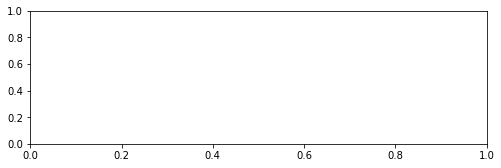

In [31]:
#X_train.columns

vital_signs = ["HR", "O2Sat", "Temp", "SBP", "MAP", "DBP", "Resp", "EtCO2"]

plt.figure(figsize=(18,12))
plt.subplots_adjust(hspace = .3)
for i, column in enumerate(vital_signs, 1):
    plt.subplot(4,2,i)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", common_norm=False, bins=60, kde=True)
    
#plt.savefig("vital_signs.png", dpi=400)

AttributeError: module 'seaborn' has no attribute 'histplot'

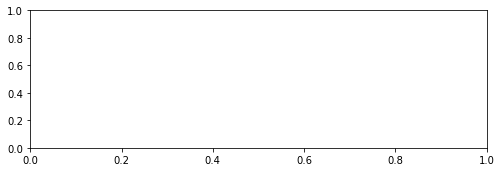

In [32]:
#X_train.columns

lab_values = ['BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets']

plt.figure(figsize=(18,42))
plt.subplots_adjust(hspace = .3)
for i, column in enumerate(lab_values, 1):
    plt.subplot(13,2,i)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", bins=60, common_norm=False, kde=True)
    
#plt.savefig("lab_values.png", dpi=400)

AttributeError: module 'seaborn' has no attribute 'histplot'

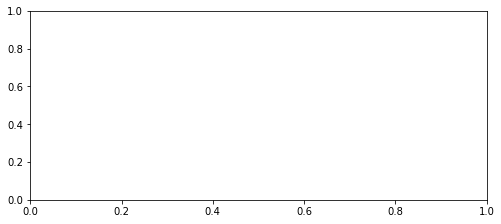

In [33]:
#X_train.columns

demographics = ["Age", "HospAdmTime", "ICULOS"]

plt.figure(figsize=(18,8))
plt.subplots_adjust(hspace = .3)
for i, column in enumerate(demographics, 1):
    plt.subplot(2,2,i)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", bins=60, common_norm=False, kde=True)
    
#plt.savefig("demographics.png", dpi=400)

In [34]:
def plotGender(data):
    gender = data
    gender[gender==0] = "female"
    gender[gender==1] = "male"
    
    sns.countplot(x=gender, hue=y_train, dodge=False)    

    
def plotUnit(data):
    Unit1 = data["Unit1"][data["Unit1"]==1].count() # patients in Unit1
    Unit2 = data["Unit2"][data["Unit2"]==1].count() # patients in Unit2
    totalNa = len(data["Unit1"][(data["Unit1"].isna()) & (data["Unit2"].isna())])
    
    sns.barplot(x=["Medical ICU","Surgical ICU","Not Given"] ,y=[Unit1, Unit2, totalNa])

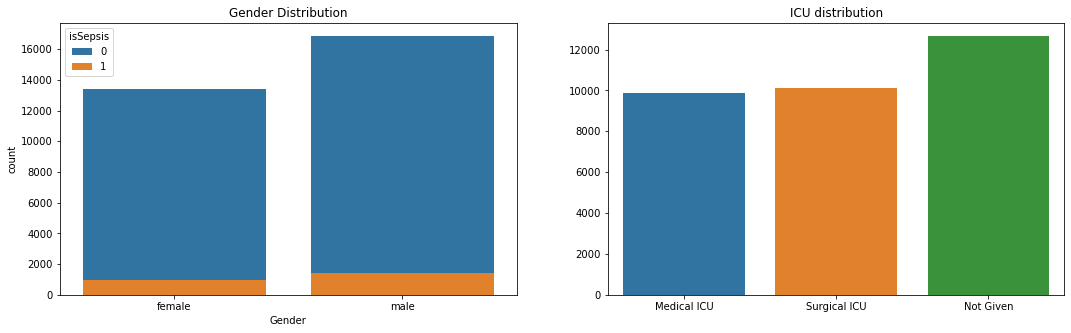

In [35]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title("Gender Distribution")
plotGender(X_train["Gender"])   
plt.subplot(1,2,2)
plt.title("ICU distribution")
plotUnit(X_train)

#plt.savefig("additional.png", dpi=400)

In [36]:
def CombineUnits(units_cols):
    data = units_cols.copy()
    data["Unit"] = pd.Series(np.zeros((len(data))))
    data.loc[data["Unit1"] == 1, "Unit"] = "MICU"
    data.loc[data["Unit2"] == 1, "Unit"] = "SICU"
    data.loc[(data["Unit1"].isna()) & (data["Unit2"].isna()), "Unit"] = "Other ICU"
    return data[["Unit"]]


def ShareSepticByUnit(UnitCol, y):
    shares = {}
    
    IsSepsis_micu = y.loc[UnitCol["Unit"] == "MICU"]
    IsSepsis_sicu = y.loc[UnitCol["Unit"] == "SICU"]
    IsSepsis_other = y.loc[UnitCol["Unit"] == "Other ICU"]
    
    shares["MICU"] = IsSepsis_micu[IsSepsis_micu == 1].count() / len(IsSepsis_micu) * 100
    shares["SICU"] = IsSepsis_sicu[IsSepsis_sicu == 1].count() / len(IsSepsis_sicu) * 100
    shares["Other"] = IsSepsis_other[IsSepsis_other == 1].count() / len(IsSepsis_other) * 100
        
    return shares


IsSeptic_shares = ShareSepticByUnit(CombineUnits(X_train.copy()), y_train)

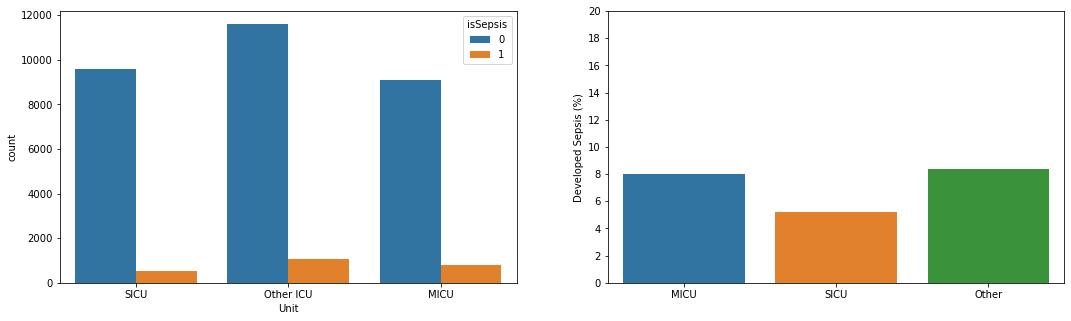

In [37]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(data=CombineUnits(X_train.copy()), x="Unit", hue=y_train)
plt.subplot(1,2,2)
plt.ylim([0,20])
plt.ylabel("Developed Sepsis (%)")
plt.yticks([i for i in range(0,21,2)])
sns.barplot(x=list(IsSeptic_shares.keys()), y=list(IsSeptic_shares.values()))

#plt.savefig("add2.png", dpi=400)

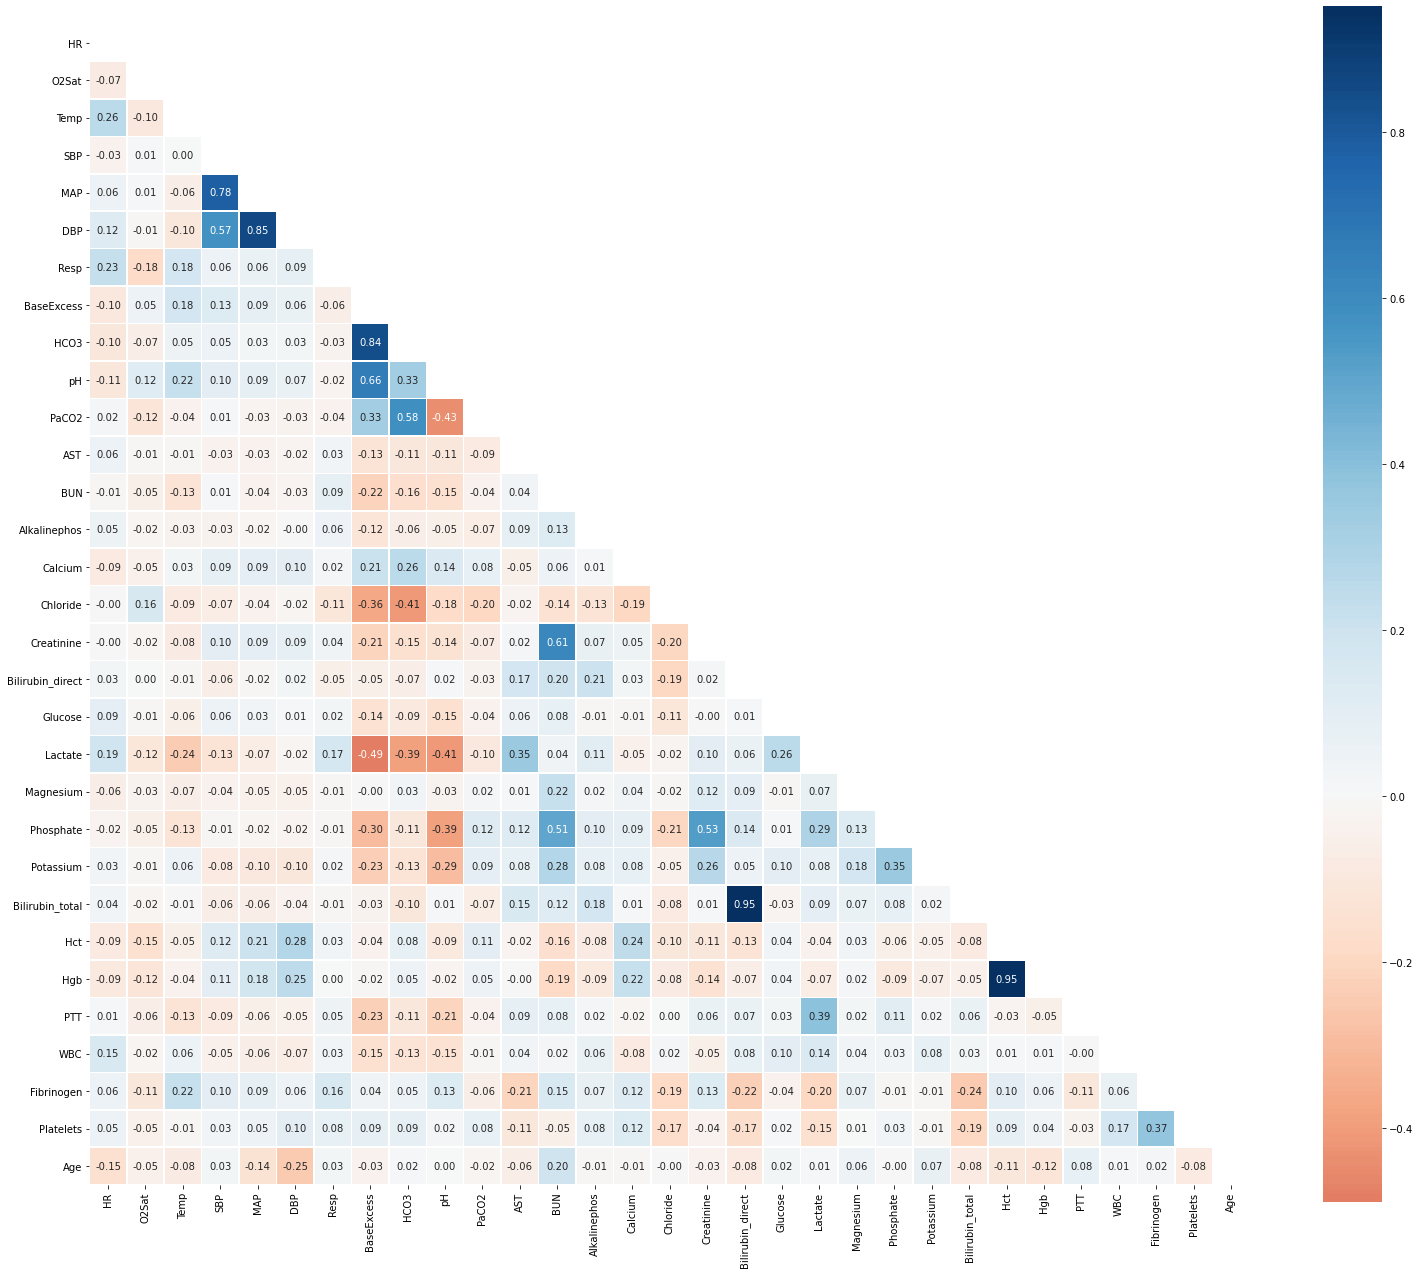

In [42]:
#X_train.columns
correlation_features = ["HR", "O2Sat", "Temp", "SBP", "MAP", "DBP", "Resp", "BaseExcess", "HCO3", "pH", "PaCO2", "AST",
                       "BUN", "Alkalinephos", "Calcium", "Chloride", "Creatinine", "Bilirubin_direct", "Glucose", "Lactate",
                       "Magnesium", "Phosphate", "Potassium", "Bilirubin_total", "Hct", "Hgb", "PTT", "WBC",
                       "Fibrinogen", "Platelets", "Age"]

mat_corr = X_train[correlation_features].corr()

mask = np.zeros_like(mat_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(26,22))
sns.heatmap(mat_corr, mask=mask, square=True, annot=True, fmt=".2f", center=0, linewidths=.5, cmap="RdBu")

#plt.savefig("cormat.png", dpi=400)

In [39]:
mat_corr["Bilirubin_total"].sort_values(ascending=False)[:3]

Bilirubin_total     1.000000
Bilirubin_direct    0.949029
Alkalinephos        0.178028
Name: Bilirubin_total, dtype: float64

In [ ]:
mat_corr["DBP"].sort_values(ascending=False)[:3]

DBP    1.000000
MAP    0.852862
SBP    0.570960
Name: DBP, dtype: float64

In [43]:
mat_corr["SBP"].sort_values(ascending=False)[:3]

SBP    1.000000
MAP    0.779998
DBP    0.570960
Name: SBP, dtype: float64

In [ ]:
mat_corr["HCO3"].sort_values(ascending=False)[:4]

HCO3          1.000000
BaseExcess    0.840452
PaCO2         0.584750
pH            0.326729
Name: HCO3, dtype: float64

In [44]:
mat_corr["pH"].sort_values(ascending=False)[:4]

pH            1.000000
BaseExcess    0.662243
HCO3          0.326729
Temp          0.215224
Name: pH, dtype: float64

In [ ]:
mat_corr["PaCO2"].sort_values(ascending=False)[:4]

PaCO2         1.000000
HCO3          0.584750
BaseExcess    0.332045
Phosphate     0.119146
Name: PaCO2, dtype: float64

In [45]:
mat_corr["Hgb"].sort_values(ascending=False)[:3]

Hgb    1.000000
Hct    0.950894
DBP    0.252229
Name: Hgb, dtype: float64

In [46]:
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer

X_train.columns
chi_cols = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2', 
       'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'ICULOS']

X_chi = X_train[chi_cols].copy()

imputer = SimpleImputer(strategy="median")
X_chi[chi_cols] = imputer.fit_transform(X_chi)

chis = chi2(X_chi, y_train)

len(chi_cols)
chis[0].reshape(len(chi_cols),1)

chi_dict = {}
p_dict = {}
for i in range(len(chi_cols)):
    chi_dict[chi_cols[i]] = chis[0][i]
    p_dict[chi_cols[i]] = chis[1][i]

In [47]:
p_dict

{'HR': 0.0,
 'O2Sat': 0.011466464410290816,
 'Temp': 0.032237016382648025,
 'SBP': 2.9803751100057315e-25,
 'MAP': 1.943923389153721e-50,
 'DBP': 1.7239655253783458e-30,
 'Resp': 1.4061071699425064e-156,
 'EtCO2': 0.6326907129777226,
 'HCO3': 0.028627967697710942,
 'FiO2': 0.6456660605949284,
 'pH': 0.980211399578117,
 'PaCO2': 0.9969658531745816,
 'SaO2': 0.8167134956577965,
 'AST': 0.0,
 'BUN': 2.158050738583087e-09,
 'Alkalinephos': 6.246303825565964e-51,
 'Calcium': 8.107272325849995e-06,
 'Chloride': 0.8103980974474069,
 'Creatinine': 9.458535259787405e-10,
 'Bilirubin_direct': 0.05918190416087963,
 'Glucose': 6.91561507171923e-06,
 'Lactate': 0.09641090268876056,
 'Magnesium': 0.2601644742509466,
 'Phosphate': 0.5991432565099556,
 'Potassium': 0.4128440538356174,
 'Bilirubin_total': 5.65974455870404e-24,
 'TroponinI': 8.81508638806515e-69,
 'Hct': 2.3991278504750204e-18,
 'Hgb': 6.4893438734460425e-06,
 'PTT': 0.006919940866320208,
 'WBC': 3.177965224173198e-08,
 'Fibrinogen': 0.

In [48]:
X_train[X_train["Calcium"] < 2].head().T

,25603,21370,26148,21928,25588
HR,96.00,58.00,90.00,81.00,89.00
O2Sat,85.00,100.00,99.50,100.00,99.50
Temp,NaN,NaN,36.60,36.55,37.00
SBP,140.00,111.00,118.00,150.00,156.00
MAP,66.00,95.00,85.00,103.00,94.00
DBP,48.00,83.00,68.50,71.00,67.00
Resp,31.00,16.00,NaN,19.00,24.00
EtCO2,NaN,NaN,NaN,NaN,42.00
BaseExcess,NaN,NaN,NaN,NaN,NaN
HCO3,NaN,NaN,NaN,NaN,NaN


In [49]:
X_train["Calcium"][X_train["Calcium"] < 2].count()

269

In [50]:
X_train[X_train["PTT"] > 150].head().T

,19147,30817,25485,30199,24498
HR,87.00,85.00,67.00,83.00,86.00
O2Sat,100.00,96.50,97.00,94.00,100.00
Temp,33.90,NaN,NaN,34.40,36.50
SBP,92.00,141.50,105.00,129.00,178.00
MAP,82.00,102.00,76.00,104.00,107.00
DBP,76.00,76.50,67.00,95.00,39.00
Resp,25.00,18.50,NaN,27.50,16.00
EtCO2,24.50,NaN,NaN,NaN,NaN
BaseExcess,NaN,NaN,NaN,NaN,NaN
HCO3,NaN,NaN,NaN,NaN,NaN


In [51]:
X_train["Calcium"][X_train["PTT"] > 150].count()

38

In [52]:
# remove outliers
y_train = y_train.loc[X_train["Age"] <= 90]
X_train = X_train.loc[X_train["Age"] <= 90]

y_test = y_test.loc[X_test["Age"] <= 90]
X_test = X_test.loc[X_test["Age"] <= 90]

In [53]:
def discretizateAge(data):
    # teen, youth, adult, senior
    bins = [13, 18, 30, 60, np.inf]
    data = np.digitize(data, bins=bins)
    data = data.reshape(len(data), 1)
    return data

DiscretizateAge = FunctionTransformer(discretizateAge)
DiscretizateAge.fit_transform(X_train["Age"]).shape

(32360, 1)

In [54]:
age_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("discretizator", DiscretizateAge)
])

age_pipeline.fit_transform(X_train[["Age"]]).shape

(32360, 1)

In [55]:
CombineAllUnits = FunctionTransformer(CombineUnits)

units = ["Unit1", "Unit2"]

units_pipeline = Pipeline([
    ("combine", CombineAllUnits),
    ("encoder", OneHotEncoder(sparse=False))
])

units_pipeline.fit_transform(X_train[units]).shape

(32360, 3)

In [56]:
acidbase_features = ["BaseExcess", "PaCO2"]

def isAcidBaseDisturb(cols):
    cols = np.c_[cols, np.zeros(len(cols))]
    cols[:,2][(cols[:,0] < -2) & (cols[:,1] < 40)] = 1
    col = cols[:,2].reshape(len(cols), 1)
    return col

FindAcidosis = FunctionTransformer(isAcidBaseDisturb)
FindAcidosis.fit_transform(X_train[acidbase_features])

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [57]:
acidbase_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("acidosis", FindAcidosis)
])

acidbase_pipeline.fit_transform(X_train[acidbase_features]).shape

(32360, 1)

In [58]:
num_features = ["HR", "O2Sat", "Temp", "MAP", "Resp", "AST", "BUN",
                "Alkalinephos", "Calcium", "Creatinine", "Glucose", "Bilirubin_total", 
                "Hgb", "PTT", "WBC", "Fibrinogen", "Platelets", "ICULOS"]

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

num_pipeline.fit_transform(X_train[num_features]).shape

(32360, 18)

In [59]:
gender_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder())
])

gender_pipeline.fit_transform(X_train[["Gender"]])

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [60]:
preprocessing_pipeline = ColumnTransformer([
    ("numbers", num_pipeline, num_features),
    ("acidbase", acidbase_pipeline, acidbase_features),
    ("age", age_pipeline, ["Age"]),
    ("units", units_pipeline, units),
    ("gender", gender_pipeline, ["Gender"])
], verbose=True)

preprocessing_pipeline.fit_transform(X_train).shape

[ColumnTransformer] ....... (1 of 5) Processing numbers, total=   0.1s
[ColumnTransformer] ...... (2 of 5) Processing acidbase, total=   0.0s
[ColumnTransformer] ........... (3 of 5) Processing age, total=   0.0s
[ColumnTransformer] ......... (4 of 5) Processing units, total=   0.0s
[ColumnTransformer] ........ (5 of 5) Processing gender, total=   0.2s


(32360, 24)

In [61]:
X_train = preprocessing_pipeline.fit_transform(X_train)

X_test = preprocessing_pipeline.fit_transform(X_test)

[ColumnTransformer] ....... (1 of 5) Processing numbers, total=   0.1s
[ColumnTransformer] ...... (2 of 5) Processing acidbase, total=   0.0s
[ColumnTransformer] ........... (3 of 5) Processing age, total=   0.0s
[ColumnTransformer] ......... (4 of 5) Processing units, total=   0.0s
[ColumnTransformer] ........ (5 of 5) Processing gender, total=   0.2s
[ColumnTransformer] ....... (1 of 5) Processing numbers, total=   0.0s
[ColumnTransformer] ...... (2 of 5) Processing acidbase, total=   0.0s
[ColumnTransformer] ........... (3 of 5) Processing age, total=   0.0s
[ColumnTransformer] ......... (4 of 5) Processing units, total=   0.0s
[ColumnTransformer] ........ (5 of 5) Processing gender, total=   0.0s


In [62]:
logreg = LogisticRegression(verbose=1)
logreg.fit(X_train, y_train)
cv_logreg = cross_validate(logreg, X_train, y_train, cv=3, scoring="recall", return_train_score=True)
cv_logreg

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


{'fit_time': array([0.17256141, 0.18018961, 0.20047903]),
 'score_time': array([0.00498676, 0.00500488, 0.00599027]),
 'test_score': array([0.33502538, 0.35532995, 0.35406091]),
 'train_score': array([0.34961929, 0.3534264 , 0.35088832])}

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
cv_knn = cross_validate(knn, X_train, y_train, cv=3, scoring="recall", return_train_score=True)
cv_knn

{'fit_time': array([0.3196435 , 0.28774834, 0.48867178]),
 'score_time': array([18.27855968, 16.93097782, 16.84059739]),
 'test_score': array([0.32614213, 0.32741117, 0.30964467]),
 'train_score': array([0.31662437, 0.32170051, 0.33185279])}

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=40, verbose=1)
cv_rf = cross_validate(rf, X_train, y_train, cv=3, scoring="recall", return_train_score=True)
cv_rf

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

{'fit_time': array([1.65141511, 1.64464641, 1.59787035]),
 'score_time': array([0.10672021, 0.0957396 , 0.09737349]),
 'test_score': array([0.66243655, 0.64086294, 0.63959391]),
 'train_score': array([0.9930203 , 0.99365482, 0.9930203 ])}

In [65]:
from xgboost import XGBClassifier

xgboost = XGBClassifier(n_estimators=30, use_label_encoder=False, scale_pos_weight=12, eval_metric="aucpr", verbosity=1, disable_default_eval_metric=1)
cv_xgboost = cross_validate(xgboost, X_train, y_train, cv=3, scoring="recall", return_train_score=True, verbose=1)
cv_xgboost

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.0s finished


{'fit_time': array([2.08274245, 0.88271022, 0.88991451]),
 'score_time': array([0.02293515, 0.02293396, 0.02094054]),
 'test_score': array([0.82106599, 0.8071066 , 0.79949239]),
 'train_score': array([0.81345178, 0.80774112, 0.81725888])}

In [66]:
nn = MLPClassifier(max_iter=5000, hidden_layer_sizes=(50,30,15,5), verbose=1, learning_rate="adaptive")
cv_nn = cross_validate(nn, X_train, y_train, cv=3, scoring="recall", return_train_score=True, verbose=1)
cv_nn

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = 0.26360764
Iteration 2, loss = 0.17997560
Iteration 3, loss = 0.16683025
Iteration 4, loss = 0.15867725
Iteration 5, loss = 0.15213810
Iteration 6, loss = 0.14612922
Iteration 7, loss = 0.14216416
Iteration 8, loss = 0.13793521
Iteration 9, loss = 0.13530233
Iteration 10, loss = 0.13298039
Iteration 11, loss = 0.12918997
Iteration 12, loss = 0.12738130
Iteration 13, loss = 0.12498515
Iteration 14, loss = 0.12380180
Iteration 15, loss = 0.12136785
Iteration 16, loss = 0.11986842
Iteration 17, loss = 0.11859464
Iteration 18, loss = 0.11662142
Iteration 19, loss = 0.11493036
Iteration 20, loss = 0.11390076
Iteration 21, loss = 0.11284508
Iteration 22, loss = 0.11326875
Iteration 23, loss = 0.11103606
Iteration 24, loss = 0.10932400
Iteration 25, loss = 0.10834389
Iteration 26, loss = 0.10828093
Iteration 27, loss = 0.10746520
Iteration 28, loss = 0.10692659
Iteration 29, loss = 0.10400444
Iteration 30, loss = 0.10364328
Iteration 31, loss = 0.10196554
Iteration 32, los

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.2min finished


{'fit_time': array([76.99937439, 53.99602938, 60.24386334]),
 'score_time': array([0.05186105, 0.04490876, 0.04596066]),
 'test_score': array([0.63071066, 0.62055838, 0.53680203]),
 'train_score': array([0.88832487, 0.90989848, 0.7607868 ])}

In [67]:
params = {"n_estimators": [25,30,35],"max_delta_step": [0.01,0.1,1], "subsample": [0.1, 0.5, 1], "reg_lambda": [0.1, 1, 1.1], "alpha": [0, 0.1, 1], "max_depth": [1,5,10]}

In [68]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=xgboost, param_grid=params, verbose=2, scoring="recall", cv=2)
grid_search = grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 729 candidates, totalling 1458 fits
[CV] alpha=0, max_delta_step=0.01, max_depth=1, n_estimators=25, reg_lambda=0.1, subsample=0.1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  alpha=0, max_delta_step=0.01, max_depth=1, n_estimators=25, reg_lambda=0.1, subsample=0.1, total=   0.4s
[CV] alpha=0, max_delta_step=0.01, max_depth=1, n_estimators=25, reg_lambda=0.1, subsample=0.1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  alpha=0, max_delta_step=0.01, max_depth=1, n_estimators=25, reg_lambda=0.1, subsample=0.1, total=   0.4s
[CV] alpha=0, max_delta_step=0.01, max_depth=1, n_estimators=25, reg_lambda=0.1, subsample=0.5 
[CV]  alpha=0, max_delta_step=0.01, max_depth=1, n_estimators=25, reg_lambda=0.1, subsample=0.5, total=   0.5s
[CV] alpha=0, max_delta_step=0.01, max_depth=1, n_estimators=25, reg_lambda=0.1, subsample=0.5 
[CV]  alpha=0, max_delta_step=0.01, max_depth=1, n_estimators=25, reg_lambda=0.1, subsample=0.5, total=   0.5s
[CV] alpha=0, max_delta_step=0.01, max_depth=1, n_estimators=25, reg_lambda=0.1, subsample=1 
[CV]  alpha=0, max_delta_step=0.01, max_depth=1, n_estimators=25, reg_lambda=0.1, subsample=1, total=   0.4s
[CV] alpha=0, max_delta_step=0.01, max_depth=1, n_estimators=25, reg_lambda=0.1, subsample=1 
[CV]  alpha=0, max_delta_step=0.01, max_depth=1, n_estimators=25, reg_lambda=0.1, subsample=1, total=   0.4s
[CV] alpha=0, max_delta_step=0.01, max_depth=1, n_estimators=25, reg_

[Parallel(n_jobs=1)]: Done 1458 out of 1458 | elapsed: 28.2min finished


In [69]:
grid_search.best_score_

0.8147208121827412

In [70]:
grid_search.best_params_

{'alpha': 0,
 'max_delta_step': 1,
 'max_depth': 5,
 'n_estimators': 35,
 'reg_lambda': 0.1,
 'subsample': 0.5}

In [71]:
from sklearn.metrics import plot_confusion_matrix

xgboost = XGBClassifier(**grid_search.best_params_, use_label_encoder=False, scale_pos_weight=12, eval_metric="aucpr", verbosity=1, disable_default_eval_metric=1)
xgboost.fit(X_train, y_train)

XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              disable_default_eval_metric=1, eval_metric='aucpr', gamma=0,
              learning_rate=0.1, max_delta_step=1, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=35, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=0.1, scale_pos_weight=12, seed=None,
              silent=None, subsample=0.5, use_label_encoder=False, verbosity=1)

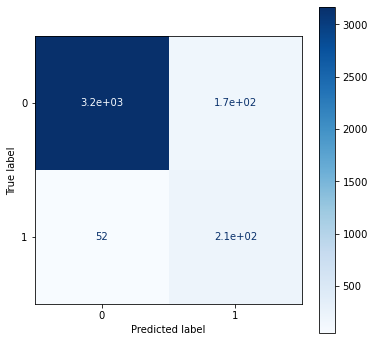

In [72]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(xgboost, X_test, y_test, cmap="Blues", ax=ax)
plt.savefig("conf.png", dpi=400)

In [73]:
y_pred = xgboost.predict(X_test)

In [74]:
from sklearn.metrics import recall_score


recall_score(y_test, y_pred)

0.8007662835249042